# NLP on Research Articles (Multi-Label Classification)

#### Introduction

   In this coursework,multi-label classifier is building through various steps like data preprocessing, text featurisation, dataset splitting, build the model, train the model, testing, also ploting bar charts to interpret the dataset, ploting confusion matrix etc. In this section, implementing 4 different experiment setup by making variations in these steps.

 The multilabel classification is the supervised learning problem, in which each instance can be associated with more than one class.

#### Importing Library Files

In [1]:
import pandas as pd
import numpy as np
import os
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Dataset

Here, the dataset has taken from the kaggle for implementing multi-label classifier. 
https://www.kaggle.com/vetrirah/janatahack-independence-day-2020-ml-hackathon

The dataset consists of: 
TITLE: Title of the research article ABSTRACT: Abstract of the research article. Analysing whether article belongs to topic computer science, Physics, Mathematics:  Statistics, Quantitative Biology, Quantitative Finance.

   In the dataset there are 20972 rows and 9 columns. It consists of two text columns and 6 tag columns. Here some texts in a row are related to more than one class which is set to 1, otherwise it is set to 0.

In [2]:
dataset=pd.read_csv('Research_Article_train.csv')
#dataset.head(15)

dataset.head(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,1 .what Reconstructing Subject-Specific Effect...,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [3]:
dataset.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [4]:
dataset.dtypes

ID                       int64
TITLE                   object
ABSTRACT                object
Computer Science         int64
Physics                  int64
Mathematics              int64
Statistics               int64
Quantitative Biology     int64
Quantitative Finance     int64
dtype: object

In [5]:
dataset['ID']=dataset['ID'].astype(float)
dataset['Computer Science']=dataset['Computer Science'].astype(float)
dataset['Physics']=dataset['Physics'].astype(float)
dataset['Mathematics']=dataset['Mathematics'].astype(float)
dataset['Statistics']=dataset['Statistics'].astype(float)
dataset['Quantitative Biology']=dataset['Quantitative Biology'].astype(float)
dataset['Quantitative Finance']=dataset['Quantitative Finance'].astype(float)
dataset.dtypes

ID                      float64
TITLE                    object
ABSTRACT                 object
Computer Science        float64
Physics                 float64
Mathematics             float64
Statistics              float64
Quantitative Biology    float64
Quantitative Finance    float64
dtype: object

In [6]:
dataset.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y=dataset[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

###### Plotting Correlation Matrix of labels

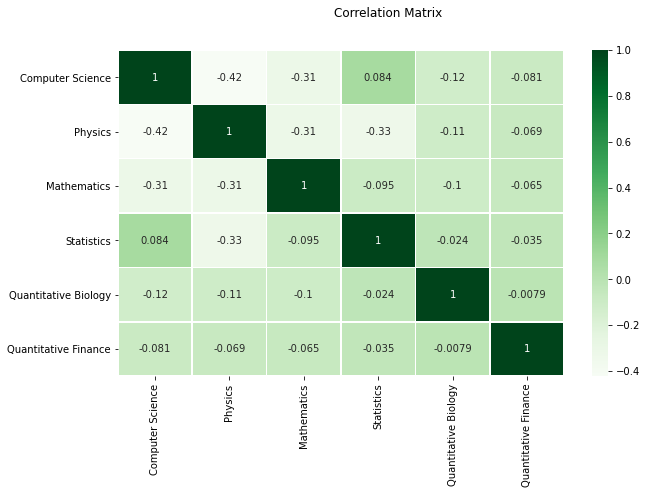

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(y.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

###### Plotting Histogram

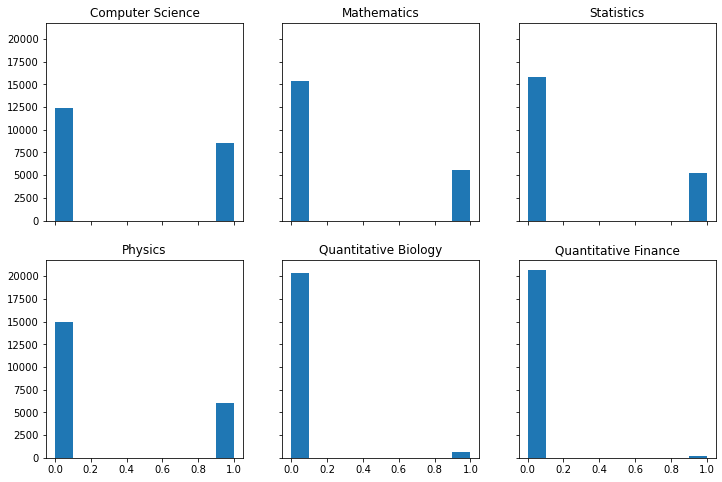

In [9]:
figure,axes=plt.subplots(2,3,sharey=True,sharex=True,figsize=(12,8))
axes[0][0].hist(dataset['Computer Science'])
axes[0][0].set_title('Computer Science')
axes[1][0].hist(dataset['Physics'])
axes[1][0].set_title('Physics')
axes[0][1].hist(dataset['Mathematics'])
axes[0][1].set_title('Mathematics')
axes[0][2].hist(dataset['Statistics'])
axes[0][2].set_title('Statistics')
axes[1][1].hist(dataset['Quantitative Biology'])
axes[1][1].set_title('Quantitative Biology')
axes[1][2].hist(dataset['Quantitative Finance'])
axes[1][2].set_title('Quantitative Finance')
plt.show()

###### Bar chart for each labels

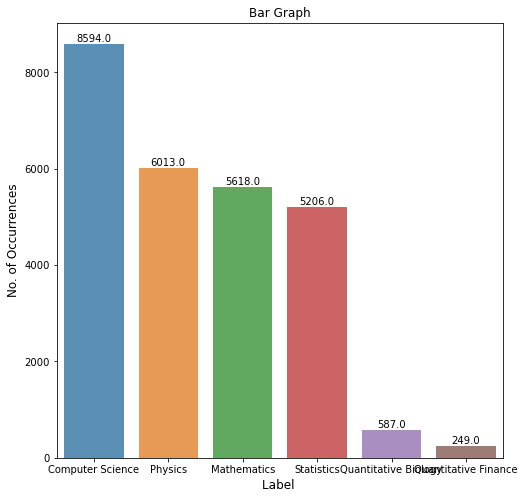

In [10]:

plt.figure(figsize=(8,8))
x=dataset.iloc[:,3:].sum()
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Bar Graph")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Label ', fontsize=12)
#adding text labels in each column labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

###### Bar chart for multiple label per article

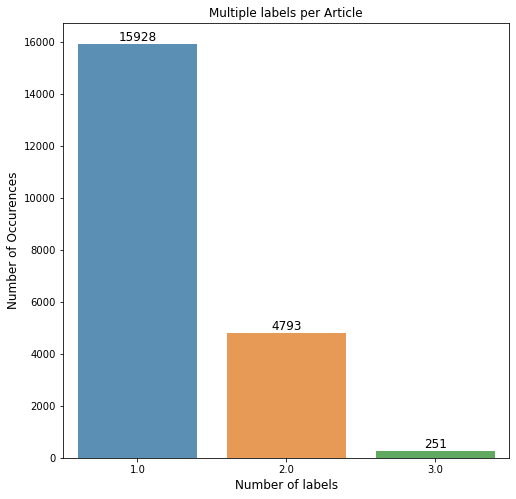

In [11]:
plt.figure(figsize=(8,8))
labelSums = dataset.iloc[:,3:].sum(axis=1)
multiLabel_counts = labelSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]
#print(multiLabel_counts)
ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values,alpha=0.8)
plt.title("Multiple labels per Article")
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)
#determine the no of multiple labels and plot it above corresponding bar chart
rects = ax.patches
labels =multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)

In [12]:
#combining 2 text columns title and abstract into one and drop columns title and abstract
dataset['Text']=dataset['TITLE']+' '+dataset['ABSTRACT']
dataset.drop(columns=['TITLE','ABSTRACT'], inplace=True)
#dataset.head(5)

## Experiment-1

The first experiment shows the data processing variations with and without lemmatization and shows how it affects the model

### Data Preprocessing without lemmatizer

In [13]:
remove_punc = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', remove_punc))

In [14]:
stopword = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopword])

In [15]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [16]:
def preprocessing(dataset):
    #convert to string type
    dataset['Text'] = dataset['Text'].astype(str)
    #convert to the lowercase
    dataset["Text"] = dataset["Text"].str.lower()
    #remove punctuations
    dataset["Text"] = dataset["Text"].apply(lambda text: remove_punctuation(text))
    #stopwords removal
    dataset["Text"] = dataset["Text"].apply(lambda text: remove_stopwords(text))
    #stemming
    dataset["Text"] = dataset["Text"].apply(lambda text: stem_words(text))
    #Remove Numbers
    dataset['Text'] =dataset["Text"].str.replace('\d+', '')
    return dataset

In [17]:

processed_data=preprocessing(dataset)


In [18]:
clean_data=processed_data[['Text','Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']]
clean_data.head(5)

,Text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,reconstruct subjectspecif effect map predict ...,1.0,0.0,0.0,0.0,0.0,0.0
1,rotat invari neural network rotat invari trans...,1.0,0.0,0.0,0.0,0.0,0.0
2,spheric polyharmon poisson kernel polyharmon f...,0.0,0.0,1.0,0.0,0.0,0.0
3,finit element approxim stochast maxwelllandaul...,0.0,0.0,1.0,0.0,0.0,0.0
4,compar studi discret wavelet transform wavelet...,1.0,0.0,0.0,1.0,0.0,0.0


### Text Featurisation

Text featurisation means converting text into vector representation, the common text featurisation technique is tfidf vectorization, where each dimension of the vector corresponds to a word and a value corresponds to a word maps in such a way that it shows frequency or importance of words in a text chunk.

In [19]:
tfidf=TfidfVectorizer(analyzer='word',max_features=10000,min_df=5, max_df=0.9, token_pattern = '(\S+)', ngram_range=(1, 2))
X=tfidf.fit_transform(clean_data['Text'])
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Splitting Dataset

 The dataset is divided into training dataset and testing dataset using train_test_split method. The training dataset with known output is used to train the model and the test dataset to used to make predictions. test_size=0.20 means the percentage of data that is used for testing.This is a simple and efficient method for splitting the dataset.

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

## Build the model

Machine learning algorithms are used for analysing datasets for a wide variety of tasks. Random forest is a supervised learning algorithm.It is a combination of decision trees and combined them together to get more accurate prediction.  It is one of the best algorithm for analysing multiple labels in the dataset. This algorithm gives better accuracy value even without hyperparameter tuning, it is effortless to calculate relative importance on each columns. Here this algorithm is used for building multi-label classifier. 

### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfclassifier=RandomForestClassifier(n_estimators=200)

In [23]:
rfclassifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [24]:
prediction=rfclassifier.predict(X_test)
prediction

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [25]:
from sklearn.metrics import accuracy_score
# View accuracy score
accuracy_score(y_test, prediction)

0.5916567342073897

### Preprocessing with lemmatizer

In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [29]:
processed_data=preprocessing(dataset)
#lemmatisation
processed_data["Text"] = processed_data["Text"].apply(lambda text: lemmatize_words(text))

In [30]:
#processed_data=preprocessing(dataset)
clean_data=processed_data[['Text','Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']]
clean_data.head(5)

,Text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,reconstruct subjectspecif effect map predict m...,1.0,0.0,0.0,0.0,0.0,0.0
1,rotat invari neural network rotat invari trans...,1.0,0.0,0.0,0.0,0.0,0.0
2,spheric polyharmon poisson kernel polyharmon f...,0.0,0.0,1.0,0.0,0.0,0.0
3,finit element approxim stochast maxwelllandaul...,0.0,0.0,1.0,0.0,0.0,0.0
4,compar studi discret wavelet transform wavelet...,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
tfidf=TfidfVectorizer(analyzer='word',max_features=10000,min_df=5, max_df=0.9, token_pattern = '(\S+)', ngram_range=(1, 2))
X=tfidf.fit_transform(clean_data['Text'])
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [33]:
rfclassifier=RandomForestClassifier(n_estimators=200)

In [34]:
rfclassifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
prediction=rfclassifier.predict(X_test)
prediction

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [36]:
from sklearn.metrics import accuracy_score
# View accuracy score
accuracy_score(y_test, prediction)

0.5928486293206198

There is a minute change noticed after the lemmatization has been done. The accuracy is increased by 0.001%

In [29]:
from sklearn.metrics import multilabel_confusion_matrix

In [30]:
print(multilabel_confusion_matrix(y_test,prediction))

[[[2070  381]
  [ 280 1464]]

 [[2942   57]
  [ 325  871]]

 [[3049   71]
  [ 361  714]]

 [[3038  131]
  [ 507  519]]

 [[4079    0]
  [ 116    0]]

 [[4145    0]
  [  50    0]]]


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

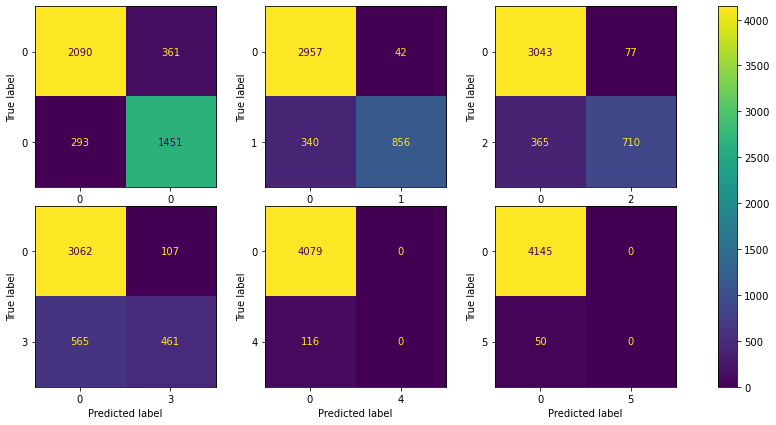

In [40]:
ytest=y_test.values 
f, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(ytest[:, i],prediction[:, i]),display_labels=[0, i])
                                  
    disp.plot(ax=axes[i], values_format='.4g')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1744
           1       0.95      0.72      0.82      1196
           2       0.90      0.66      0.76      1075
           3       0.81      0.45      0.58      1026
           4       0.00      0.00      0.00       116
           5       0.00      0.00      0.00        50

   micro avg       0.86      0.67      0.75      5207
   macro avg       0.58      0.44      0.50      5207
weighted avg       0.83      0.67      0.73      5207
 samples avg       0.74      0.71      0.71      5207

